# Customer Personality Analysis
**An analysis of a company's ideal customers by Group Algorithm <br> of the Hamoye Data Science Internship Programme**

## Context 
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
Need to perform clustering to summarize customer segments.

### Import libraries and load dataset

In [284]:
# data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [285]:
# read csv file into notebook
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [286]:
# concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [287]:
# checking for nulls
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [288]:
# confirming nulls are gone
df = df.dropna()
df.isnull().sum().any()
print('There are no null values left')

There are no null values left


In [289]:
# checking for categorical features
cat_cols = df.select_dtypes(include='object').columns
for cat in cat_cols:
    print(f'\nValue counts for: {cat}\n\n {df[cat].value_counts()}')
    print('-' * 100)


Value counts for: Education

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------

Value counts for: Marital_Status

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------

Value counts for: Dt_Customer

 31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
----------------------------------------------------------------------------------------------------


## Feature Engineering

In [290]:
pd.Timestamp('2015-01-01')

Timestamp('2015-01-01 00:00:00')

In [291]:
# customer age: since the customer registration with the company was between 2012 and 2014, we assume that the data was collected in January 2015 for simplicity.
df['Age'] = 2015 - df['Year_Birth']

# total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# total number of dependents in each customer's household
# df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1 # marital status may be included.
df['No_of_Dependents'] = df['Kidhome'] + df['Teenhome']

# total number of campaigns accepted by each customer
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Acceptance'] = df[campaign_cols].sum(axis=1)

# number of months since each customer's enrollment with the company until the current date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Months_of_Enrollment'] = ((pd.Timestamp('2015-01-01') - df['Dt_Customer']) / np.timedelta64(1, 'M')).astype(int)

# most frequent purchasing channel
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Purchasing_Channel'] = df[purchase_cols].idxmax(axis=1).str.replace('Num', '')

# total purchases
total_purchases_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[total_purchases_col].sum(axis=1)

# website activity
website_cols = ['NumWebPurchases', 'NumWebVisitsMonth']
df['Website_Activity'] = df[website_cols].sum(axis=1)

# total number of campaigns responded to by each customer
response_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Campaign_Response'] = df[response_cols].sum(axis=1)

# marital status new
df['Marital_Status_New'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'No_Partner',
    'Divorced': 'No_Partner',
    'Widow': 'No_Partner',
    'Alone': 'No_Partner',
    'Absurd': 'No_Partner',
    'YOLO': 'No_Partner'
})

# education level
df['Education_Level'] = df['Education'].replace({
    'Graduation': 'Graduate',
    'PhD': 'Post_Graduate',
    'Master': 'Post_Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic': 'Undergraduate'
})

# parental status
df['Parent'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)

df['Income_Ratio'] = df['Total_Spending'] / df['Income']

# dropping redundant columns
df = df.drop([
    'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'Marital_Status', 'Education',
    'Z_CostContact', 'Z_Revenue', 'NumWebVisitsMonth', 'NumDealsPurchases'
], axis=1)

In this code, we first convert the 'Dt_Customer' column to a datetime format using pd.to_datetime(). Then, we calculate the difference between the date '2015-01-01' (converted to a Timestamp object) and each customer's enrollment date. By dividing the result by np.timedelta64(1, 'M'), we obtain the number of months. Finally, we cast the result to an integer using .astype(int).

In [292]:
# random samples of the dataset
df.sample(10)

,ID,Income,Recency,Complain,Age,Total_Spending,No_of_Dependents,Total_Acceptance,Months_of_Enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent,Income_Ratio
1560,5424,39922.0,30,0,32,156,1,0,22,StorePurchases,9,11,0,Partner,Graduate,1,0.003908
36,4339,67353.0,37,0,45,913,1,0,12,StorePurchases,28,7,0,Partner,Post_Graduate,1,0.013555
279,4391,63841.0,64,0,47,908,1,0,20,WebPurchases,22,15,0,No_Partner,Post_Graduate,1,0.014223
1091,1833,39190.0,91,0,41,133,1,0,8,StorePurchases,9,7,0,No_Partner,Post_Graduate,1,0.003394
233,9617,15033.0,37,0,64,19,0,0,8,StorePurchases,5,4,0,No_Partner,Graduate,0,0.001264
1601,5453,90226.0,26,0,59,2352,0,1,27,StorePurchases,24,6,1,Partner,Post_Graduate,0,0.026068
380,2098,33581.0,38,0,46,17,2,0,17,StorePurchases,4,9,0,Partner,Post_Graduate,1,0.000506
876,773,42835.0,64,0,44,595,2,0,18,WebPurchases,23,12,0,No_Partner,Post_Graduate,1,0.013891
1952,3434,80872.0,60,0,64,1336,0,0,0,StorePurchases,19,5,0,No_Partner,Graduate,0,0.016520
829,6646,16529.0,23,0,31,22,1,0,11,StorePurchases,5,7,0,Partner,Graduate,1,0.001331


In [293]:
# Generate descriptive statistics.
df.describe()

,ID,Income,Recency,Complain,Age,Total_Spending,No_of_Dependents,Total_Acceptance,Months_of_Enrollment,Total_Purchases,Website_Activity,Campaign_Response,Parent,Income_Ratio
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,0.009477,46.179603,607.075361,0.947202,0.298285,17.172834,14.880866,9.404332,0.448556,0.714350,0.009912
std,3249.376275,25173.076661,28.948352,0.096907,11.985554,602.900476,0.749062,0.679209,7.642072,7.670957,3.565683,0.892440,0.451825,0.016816
min,0.000000,1730.000000,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039
25%,2814.750000,35303.000000,24.000000,0.000000,38.000000,69.000000,0.000000,0.000000,12.000000,8.000000,7.000000,0.000000,0.000000,0.002346
50%,5458.500000,51381.500000,49.000000,0.000000,45.000000,396.500000,1.000000,0.000000,17.000000,15.000000,9.000000,0.000000,1.000000,0.008005
75%,8421.750000,68522.000000,74.000000,0.000000,56.000000,1048.000000,1.000000,0.000000,23.000000,21.000000,11.000000,1.000000,1.000000,0.015533
max,11191.000000,666666.000000,99.000000,1.000000,122.000000,2525.000000,3.000000,4.000000,35.000000,44.000000,28.000000,5.000000,1.000000,0.706988


In [294]:
# concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2216 non-null   int64  
 1   Income                2216 non-null   float64
 2   Recency               2216 non-null   int64  
 3   Complain              2216 non-null   int64  
 4   Age                   2216 non-null   int64  
 5   Total_Spending        2216 non-null   int64  
 6   No_of_Dependents      2216 non-null   int64  
 7   Total_Acceptance      2216 non-null   int64  
 8   Months_of_Enrollment  2216 non-null   int32  
 9   Purchasing_Channel    2216 non-null   object 
 10  Total_Purchases       2216 non-null   int64  
 11  Website_Activity      2216 non-null   int64  
 12  Campaign_Response     2216 non-null   int64  
 13  Marital_Status_New    2216 non-null   object 
 14  Education_Level       2216 non-null   object 
 15  Parent               

## Exploratory Data Analysis

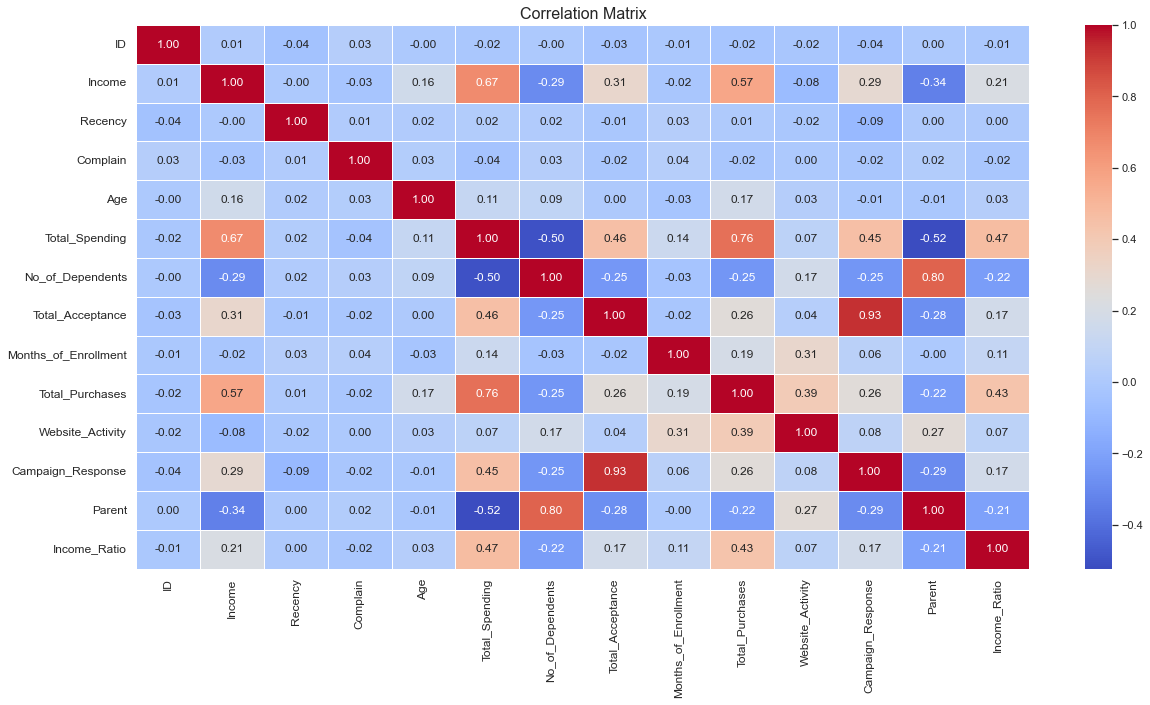

In [295]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=[20, 10])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

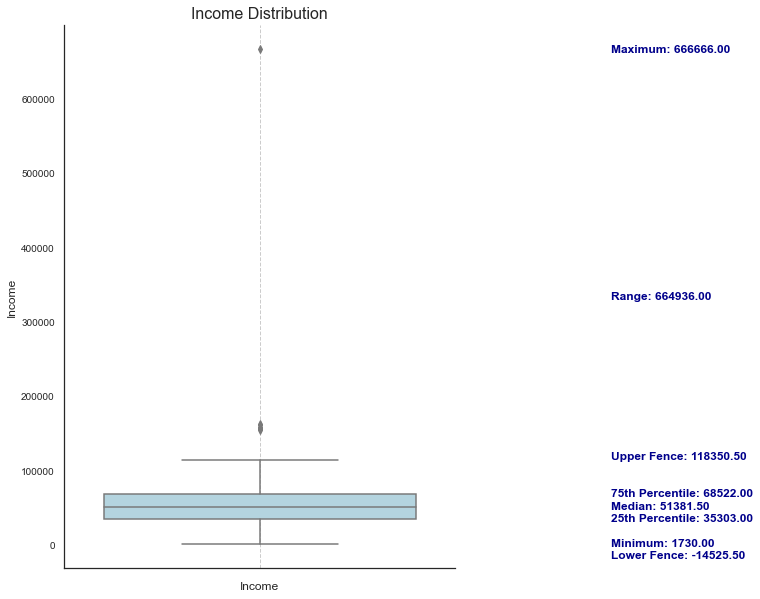

In [296]:
# income distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Income'], color='lightblue', linewidth=1.5)

age_stats = df['Income'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_income = df[(df['Income'] < q1 - 1.5 * iqr) | (df['Income'] > q3 + 1.5 * iqr)]['Income']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

we can see there are outliers in the Income

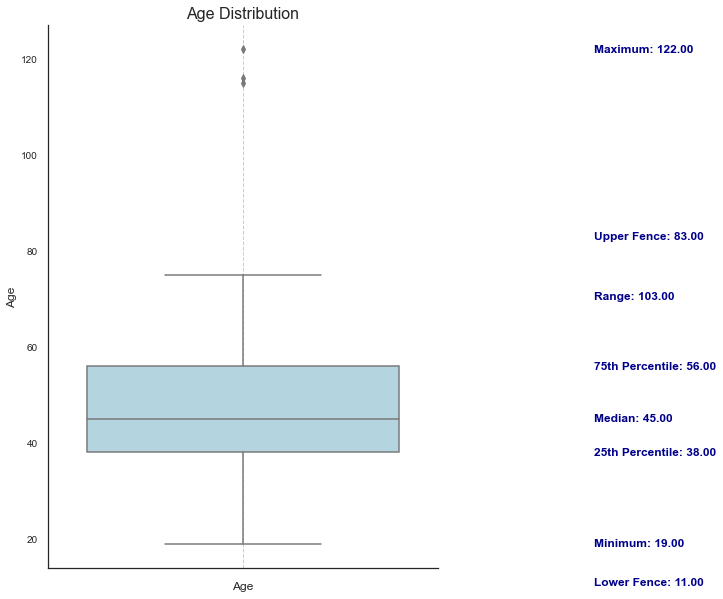

In [297]:
# Age distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Age'], color='lightblue', linewidth=1.5)

age_stats = df['Age'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_age = df[(df['Age'] < q1 - 1.5 * iqr) | (df['Age'] > q3 + 1.5 * iqr)]['Age']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

we can see there are outliers in the Age

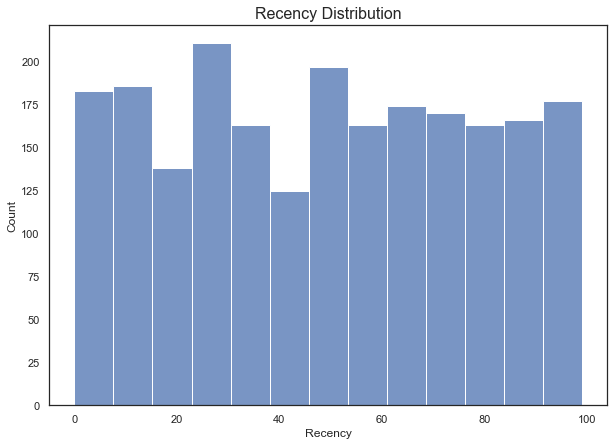

In [298]:
# Recency distribution
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Recency')
plt.title('Recency Distribution', fontsize=16)
plt.show();

<Figure size 720x504 with 0 Axes>

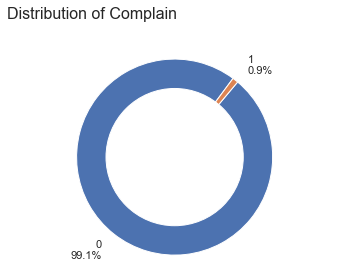

In [299]:
# Complain distribution
plt.figure(figsize=[10, 7])
counts = df['Complain'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Complain', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

A vast majority of the customers did not complain in the last two years.

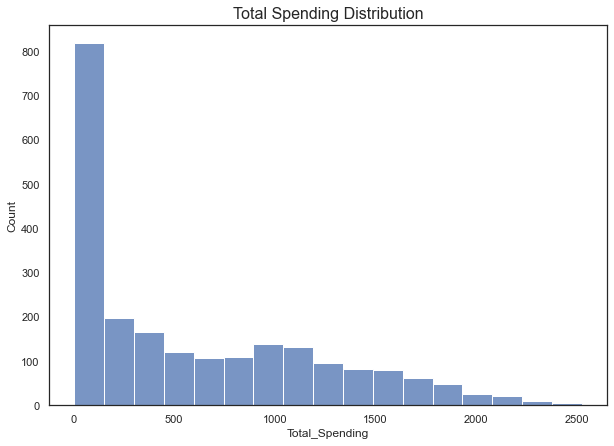

In [300]:
# total spending
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Spending')
plt.title('Total Spending Distribution', fontsize=16)
plt.show();

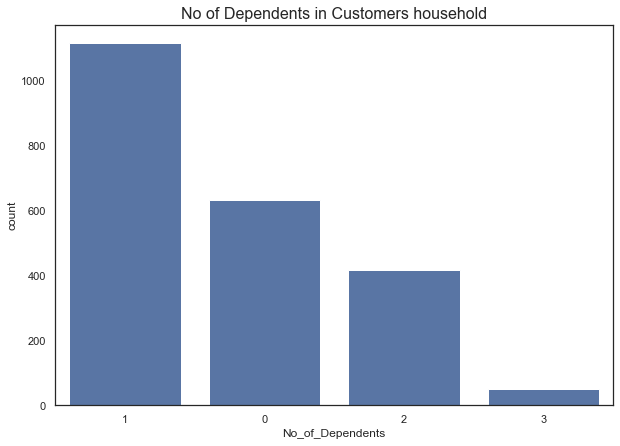

In [301]:
# family size dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['No_of_Dependents'].value_counts().index
sns.countplot(df['No_of_Dependents'], color=color, order=order)
plt.title('No of Dependents in Customers household', fontsize=16)
plt.show();

Majority of the customers have a single dependent.

<Figure size 720x504 with 0 Axes>

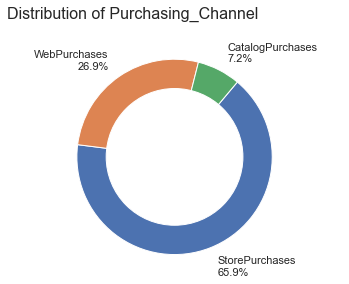

In [302]:
# Purchasing_Channel distribution
plt.figure(figsize=[10, 7])
counts = df['Purchasing_Channel'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Purchasing_Channel', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers made purchases via the Store.

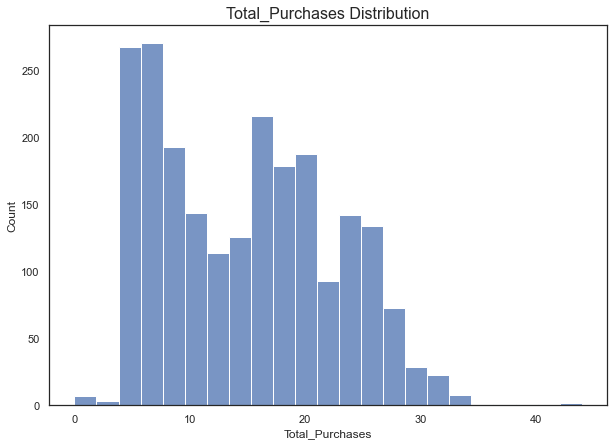

In [303]:
# total Total_Purchases
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Purchases')
plt.title('Total_Purchases Distribution', fontsize=16)
plt.show();

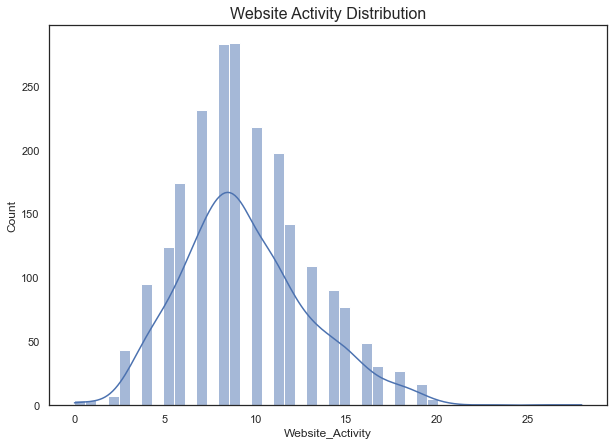

In [304]:
# Website_Activity dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.histplot(df['Website_Activity'], color=color, kde=True)
plt.title('Website Activity Distribution', fontsize=16)
plt.show();

The Website Activity distribution is positively skewed

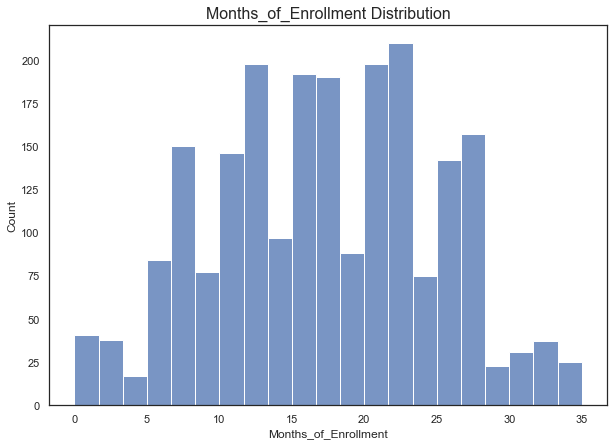

In [305]:
# Months_of_Enrollment distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.histplot(df['Months_of_Enrollment'], color=color)
plt.title('Months_of_Enrollment Distribution', fontsize=16)
plt.show();

Most customers enrolled between 20 and 25 months ago

<Figure size 720x504 with 0 Axes>

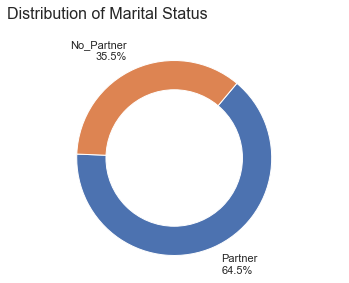

In [306]:
# Marital_Status_New distribution
plt.figure(figsize=[10, 7])
counts = df['Marital_Status_New'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Marital Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have partners.

<Figure size 720x504 with 0 Axes>

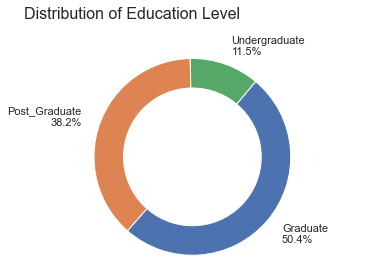

In [307]:
# Education_Level distribution
plt.figure(figsize=[10, 7])
counts = df['Education_Level'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Education Level', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have are Graduates.

<Figure size 720x504 with 0 Axes>

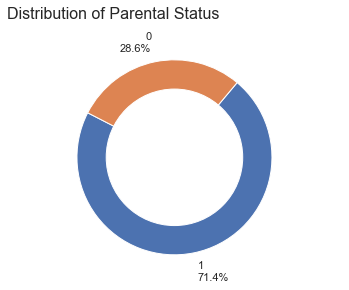

In [308]:
# Parent distribution
plt.figure(figsize=[10, 7])
counts = df['Parent'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Parental Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers are parents.

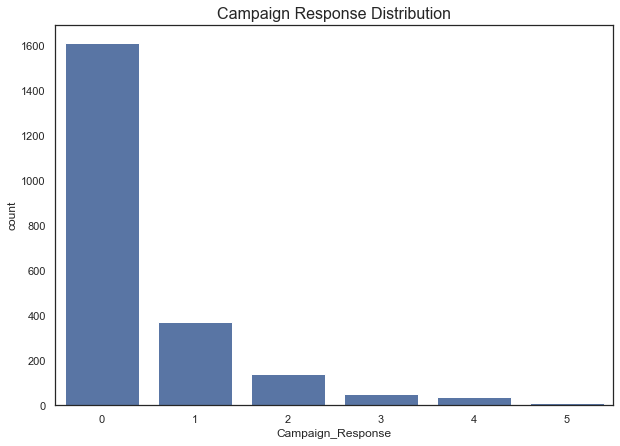

In [309]:
# Campaign_Response dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['Campaign_Response'].value_counts().index
sns.countplot(df['Campaign_Response'], color=color, order=order)
plt.title('Campaign Response Distribution', fontsize=16)
plt.show();

Customers that didn't respond to campaigns are the majority.

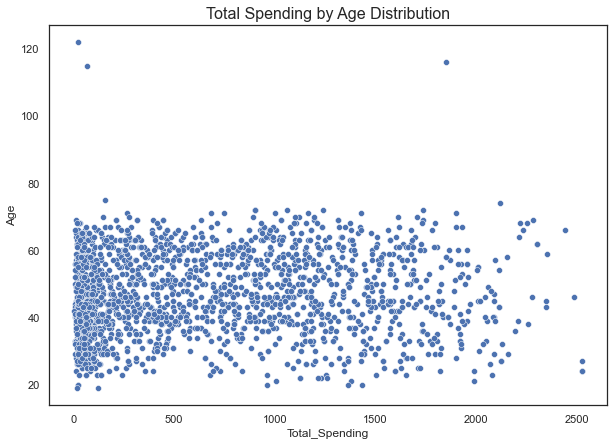

In [310]:
# Total Spending by Age Distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.scatterplot(data=df, x='Total_Spending', y='Age',  color=color)
plt.title('Total Spending by Age Distribution', fontsize=16)
plt.show();

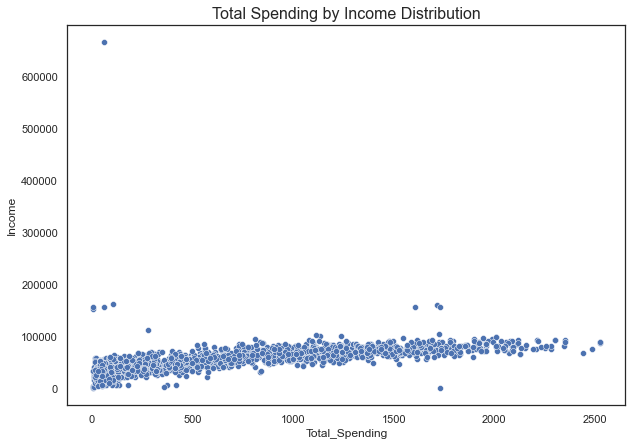

In [311]:
# Total Spending by Income Distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.scatterplot(data=df, x='Total_Spending',  y='Income',  color=color)
plt.title('Total Spending by Income Distribution', fontsize=16)
plt.show();

The Income of customers is positively correlated with the total ampount they have spent.

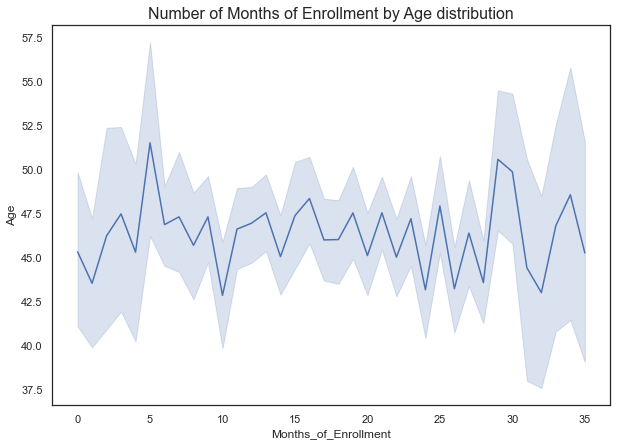

In [312]:
# Days of Enrollment by Age distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.lineplot(data=df, x='Months_of_Enrollment',  y='Age',  color=color)
plt.title('Number of Months of Enrollment by Age distribution', fontsize=16)
plt.show();

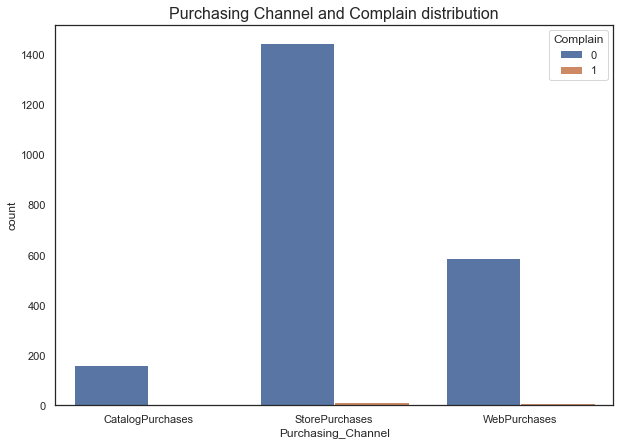

In [313]:
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.countplot(data=df, x='Purchasing_Channel', hue='Complain')
plt.title('Purchasing Channel and Complain distribution', fontsize=16)
plt.show();

## Data Preprocessing and Scaling

we can see there are some outliers in the `Age` and `Income` columns

In [314]:
def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)

print_outliers(df['Age'])
print_outliers(df['Income'])

Outliers in Age:
192    115
239    122
339    116
Name: Age, dtype: int64
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


In [315]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(df['Age'])
no_outliers_income = remove_outliers(df['Income'])
df_no = df[(df['Age'].isin(no_outliers_age)) & (df['Income'].isin(no_outliers_income))]
df_no.sample(10)

,ID,Income,Recency,Complain,Age,Total_Spending,No_of_Dependents,Total_Acceptance,Months_of_Enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent,Income_Ratio
1012,1710,30168.0,51,0,37,279,1,0,17,WebPurchases,18,15,0,No_Partner,Graduate,1,0.009248
1802,6289,59385.0,85,0,64,185,2,0,20,StorePurchases,10,8,0,Partner,Post_Graduate,1,0.003115
793,11075,51267.0,37,0,37,270,2,0,14,StorePurchases,15,7,0,Partner,Graduate,1,0.005267
234,3233,62745.0,89,0,50,1117,1,0,21,StorePurchases,29,12,0,Partner,Post_Graduate,1,0.017802
1535,9771,23331.0,97,0,27,269,1,0,31,WebPurchases,17,14,0,No_Partner,Undergraduate,1,0.011530
1089,7348,71691.0,0,0,57,1192,0,0,9,CatalogPurchases,17,6,1,No_Partner,Post_Graduate,0,0.016627
1288,9010,83151.0,80,0,43,2346,0,3,14,StorePurchases,23,7,4,Partner,Post_Graduate,0,0.028214
47,7286,41728.0,92,0,47,55,1,0,19,WebPurchases,5,12,0,Partner,Graduate,1,0.001318
660,55,56253.0,83,0,52,597,1,0,29,StorePurchases,22,13,0,Partner,Graduate,1,0.010613
33,7373,46610.0,8,0,63,302,2,0,26,StorePurchases,17,10,1,No_Partner,Post_Graduate,1,0.006479


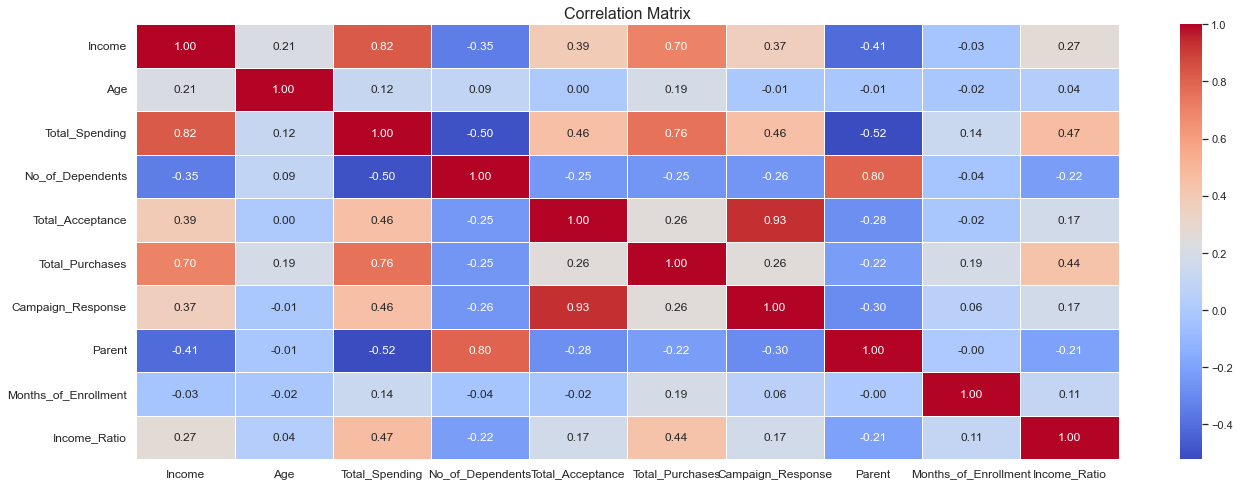

In [316]:
# now lets check item correlation after removing outliers
corr = df_no[['Income', 'Age', 'Total_Spending', 'No_of_Dependents', 'Total_Acceptance', 
              'Total_Purchases', 'Campaign_Response', 'Parent', 'Months_of_Enrollment', 'Income_Ratio']].corr()
plt.figure(figsize=[22, 8])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [317]:
# apply label encoding and scale the dataset
le = LabelEncoder()
cat_cols = df_no.select_dtypes(include='object').columns
for col in cat_cols:
    df_no[col] = le.fit_transform(df_no[col])
    
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no)
df_scaled = pd.DataFrame(scaled_data, columns=df_no.columns)
df_scaled.head()

,ID,Income,Recency,Complain,Age,Total_Spending,No_of_Dependents,Total_Acceptance,Months_of_Enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent,Income_Ratio
0,-0.018923,0.314651,0.310830,-0.095673,1.017189,1.679323,-1.266589,-0.439991,1.939722,-2.189411,1.328161,1.573210,0.614920,-1.347625,-0.892338,-1.58466,1.061409
1,-1.050705,-0.254877,-0.380600,-0.095673,1.273530,-0.963897,1.403420,-0.439991,-1.723736,-0.362140,-1.167390,-0.972274,-0.503808,-1.347625,-0.892338,0.63105,-0.555254
2,-0.444880,0.965354,-0.795458,-0.095673,0.333612,0.281242,-1.266589,-0.439991,-0.153683,-0.362140,0.802782,0.724716,-0.503808,0.742046,-0.892338,-1.58466,0.053487
3,0.183737,-1.206087,-0.795458,-0.095673,-1.289883,-0.920675,0.068415,-0.439991,-1.985412,-0.362140,-0.904700,-0.406610,-0.503808,0.742046,-0.892338,0.63105,-0.471754
4,-0.080522,0.322136,1.555404,-0.095673,-1.033542,-0.307248,0.068415,-0.439991,-0.807872,-0.362140,0.540092,0.159053,-0.503808,0.742046,0.571654,0.63105,-0.160049


## Dimensionality Reduction Using Principal Component Analysis
Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the essential information. It aims to simplify the data representation by identifying and capturing the most important patterns and relationships in the data. <br>
it is worth noting that in this dataset, there are highly correlated values among the features in the dataset. This high correlation can lead to multicollinearity issues, where the presence of redundant information can negatively affect the clustering algorithm's performance. <br><br>
One commonly used technique for dimensionality reduction is Principal Component Analysis (PCA), which transforms the original features into a new set of orthogonal variables called principal components. These components capture the maximum variance in the data, allowing for a lower-dimensional representation. Here, I used PCA not only for dimensionality reduction but also to mitigate the impact of highly correlated features, resulting in a more robust and accurate clustering analysis.

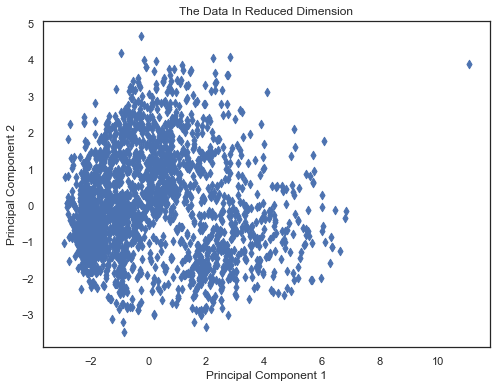

In [318]:
# copy the dataset into a new variable X
X = df_scaled.copy()

# Apply PCA for dimensionality reduction. Keep 2 componenets
pca = PCA(n_components=2)

#Fit the model with X and apply the dimensionality reduction on X.
X_pca = pca.fit_transform(X)

# Plot the reduced dimension using PCA
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='d')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The Data In Reduced Dimension')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


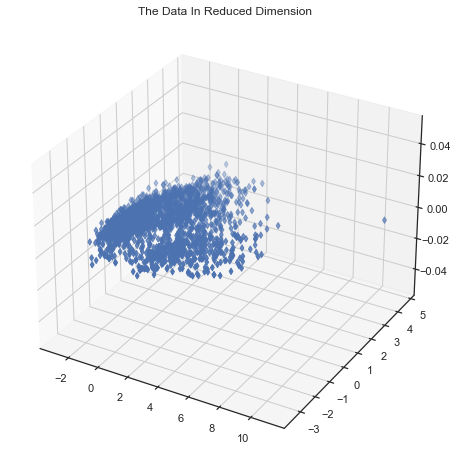

In [319]:
x =X_pca[:, 0]
y =X_pca[:, 1]
color = sns.color_palette()[0]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y, c=color, marker="d")
ax.set_title('The Data In Reduced Dimension')
plt.show();

## Checking the optimal number of clusters
To check the optimal number of clusters, we use the following evaluation techniques namely;
<ul>
    <li>Elbow Curve method</li>
    <li>Silhouette score Curve method</li>
    <li>Calinski-Harabasz index curve</li>
</ul>

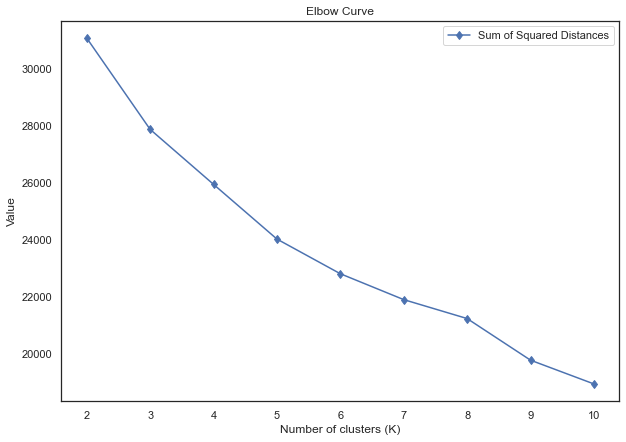

The optimal number of clusters (Elbow method) is: 8


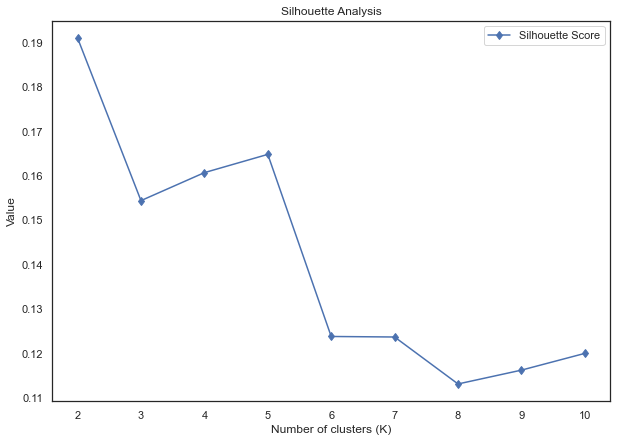

The optimal number of clusters (Silhouette method) is: 2


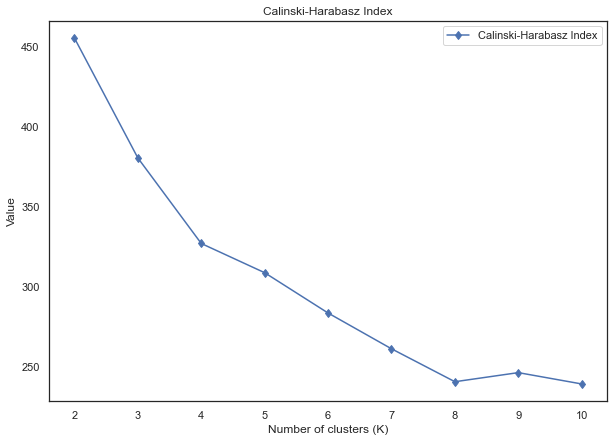

The optimal number of clusters (Calinski-Harabasz method) is: 2


In [320]:
min_clusters = 2
max_clusters = 10
distortions = []
silhouette_scores = []
ch_scores = []

# Fit K-means and compute the sum of squared distances, silhouette scores, and CH scores
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(df_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), distortions, marker='d', label='Sum of Squared Distances')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Elbow Curve')
plt.legend()
plt.show()

rate_of_change = np.diff(distortions)
rate_of_change_ratio = rate_of_change[1:] / rate_of_change[:-1]
optimal_k_elbow = np.argmax(rate_of_change_ratio) + min_clusters + 1

# Print the optimal number of clusters based on the elbow method
print(f"The optimal number of clusters (Elbow method) is: {optimal_k_elbow}")

# Plot the silhouette scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='d', label='Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Silhouette Analysis')
plt.legend()
plt.show()

# Identify the optimal number of clusters using silhouette score
optimal_k_silhouette = np.argmax(silhouette_scores) + min_clusters

# Print the optimal number of clusters based on the silhouette method
print(f"The optimal number of clusters (Silhouette method) is: {optimal_k_silhouette}")

# Plot the Calinski-Harabasz scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), ch_scores, marker='d', label='Calinski-Harabasz Index')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Calinski-Harabasz Index')
plt.legend()
plt.show()

# Identify the optimal number of clusters using Calinski-Harabasz index
optimal_k_ch = np.argmax(ch_scores) + min_clusters

# Print the optimal number of clusters based on the Calinski-Harabasz index
print(f"The optimal number of clusters (Calinski-Harabasz method) is: {optimal_k_ch}")

In this case, we would prioritize the Silhouette method and the Calinski-Harabasz method, as they both provide insights into the quality and separation of the clusters. <br>
The **Silhouette method** suggests 2 aclusters, indicating that the data points within each cluster are relatively well-separated from points in other clusters. This could imply a clear distinction between two major customer segments. <br>
The **Calinski-Harabasz method** also suggests 2 clusters, indicating a high inter-cluster variance compared to the intra-cluster variance. This suggests that the clusters are well-separated and distinct from each other.

After performing dimensionality reduction using PCA and also finding the optimal number of Clusters, we will cluster the data and visualize it using the `Agglomerative Clustering algorithm.`

## Agglomerative Clustering

Now that I have reduced the attributes to two dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved. And since we have `2` to be the optimal number of clusters from the methods we used above, we will set it to 2 in the Agglomerative Clustering.

Cluster Counts:
1    1135
0    1070
Name: Cluster, dtype: int64


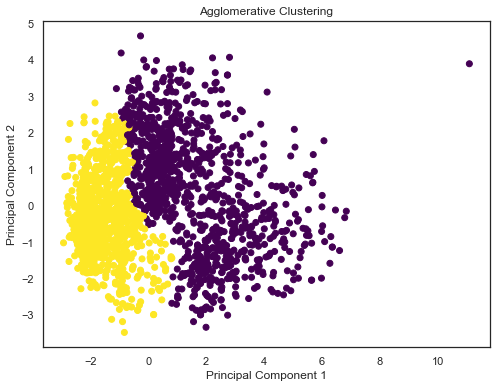

In [322]:
# Fit Agglomerative Clustering model
clustering = AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X_pca)

# Obtain cluster labels
cluster_labels = clustering.labels_

# Add the cluster labels to the original dataframe
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = cluster_labels

# Analyze Clusters
cluster_counts = df_clustered['Cluster'].value_counts()
print('Cluster Counts:')
print(cluster_counts)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Now lets have a visual distribution of the Clusters.

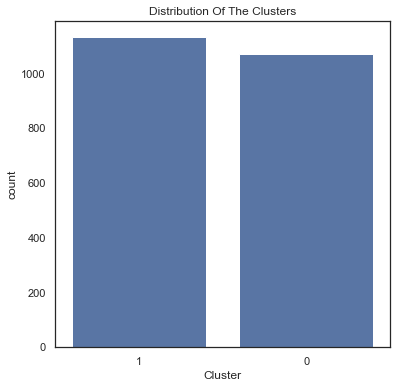

In [323]:
plt.figure(figsize=[6, 6])
order = df_clustered['Cluster'].value_counts().index
color = sns.color_palette()[0]
pl = sns.countplot(x=df_clustered["Cluster"], color=color, order=order)
pl.set_title("Distribution Of The Clusters")
plt.show()

We can see that the clusters are evenly distributed.

In [324]:
# Evaluate clustering results
# silhouette_avg = silhouette_score(X_pca, cluster_labels)
# print(f"Silhouette Score: {silhouette_avg:.3f}")

# # Calculate cluster means
# cluster_means = df_clustered.groupby('Cluster').mean()
# print('\nCluster Means:')
# display(cluster_means)

## Cluster Profiling

In [359]:
df['Cluster'] = df_clustered['Cluster']
df = df.dropna()
df['Cluster']  = df['Cluster'].astype(int)

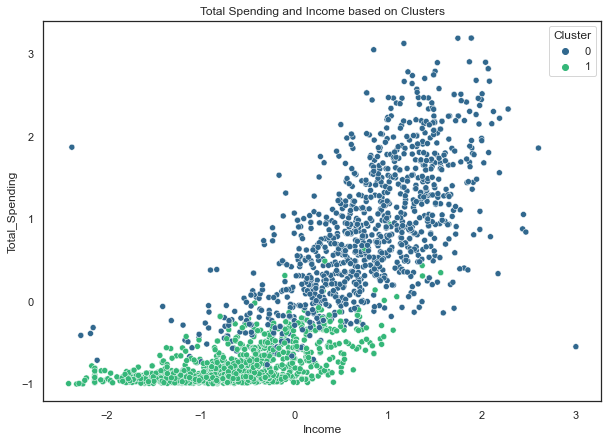

In [325]:
plt.figure(figsize=[10, 7])
sns.scatterplot(data=df_clustered, x='Income', y='Total_Spending', hue='Cluster', palette='viridis')
plt.title('Total Spending and Income based on Clusters')
plt.show()

**Insights:** <br>
Cluster 0: High Income and High Spending <br>
Cluster 1: Low Income and Low Spending

Cluster 0: Low Income and Low Spending

Cluster 1: High Income and High Spending

Cluster 2: Average Income and Average Spending


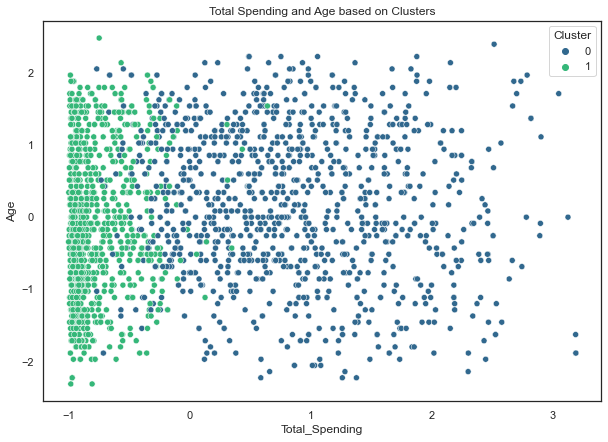

In [326]:
plt.figure(figsize=[10, 7])
sns.scatterplot(data=df_clustered, x='Total_Spending', y='Age', hue='Cluster', palette='viridis')
plt.title('Total Spending and Age based on Clusters')
plt.show();

**Insights:** <br>
Cluster 0: High Age and Low Spending <br>
Cluster 1: High Age and High Spending

Cluster 0 - Low Spending and High Age<br>
Cluster 1 - High Spending and Old Age <br>
Cluster 2 - Average Spending and Old customers<br>

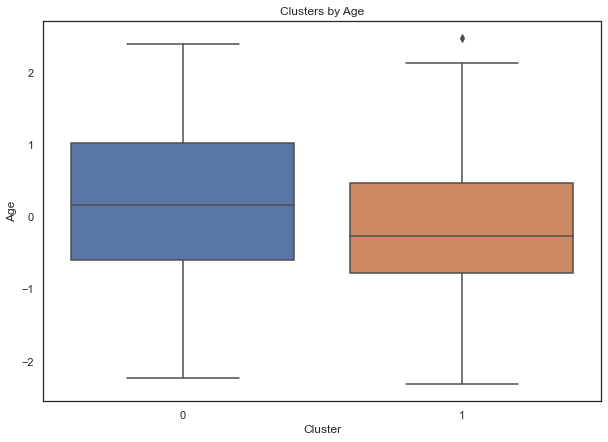

In [343]:
plt.figure(figsize=[10, 7])
sns.boxplot(data=df_clustered, x='Cluster', y='Age')
plt.title('Clusters by Age')
plt.show();

**Insights:** <br>


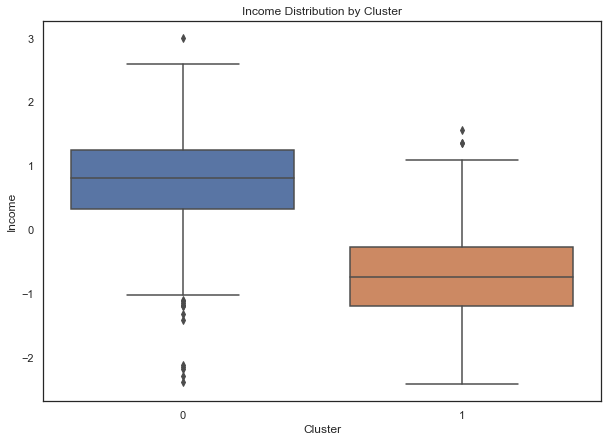

In [344]:
plt.figure(figsize=[10, 7])
sns.boxplot(data=df_clustered, x='Cluster', y='Income')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Income Distribution by Cluster')
plt.show()

**Insights:** <br>


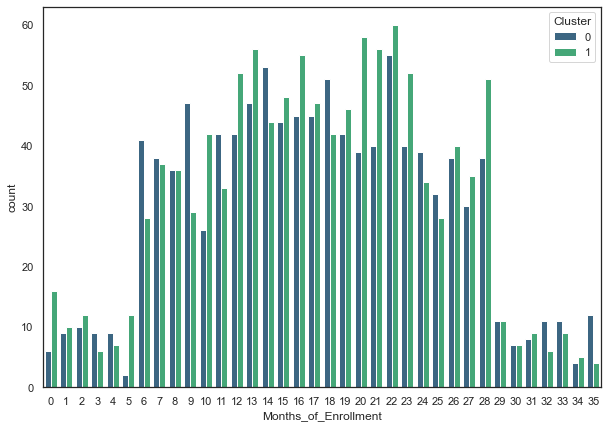

In [363]:
plt.figure(figsize=[10, 7])
sns.countplot(data=df, x='Months_of_Enrollment', hue='Cluster', palette='viridis')
plt.show();

**Insights:** <br>


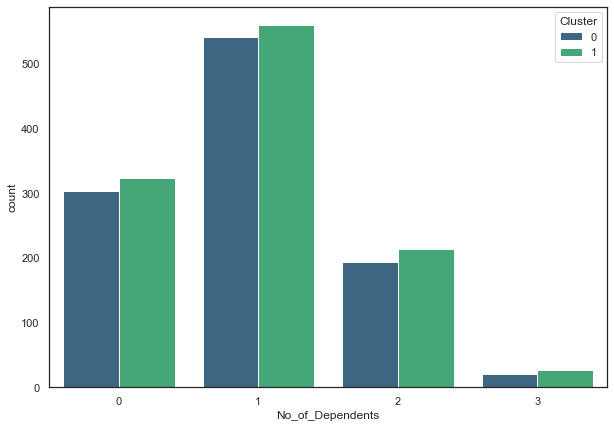

In [364]:
plt.figure(figsize=[10, 7])
sns.countplot(data=df, x='No_of_Dependents', hue='Cluster', palette='viridis')
plt.show();

**Insights:** <br>


In [371]:
fig = px.scatter_3d(df_clustered, x='Income', y='Total_Spending', z='Total_Purchases', color='Cluster')
fig.show()

**Insights:** <br>


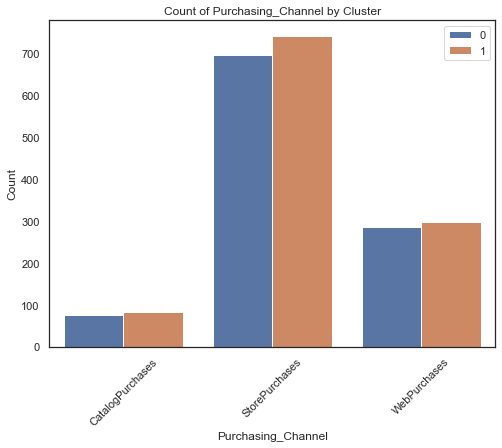

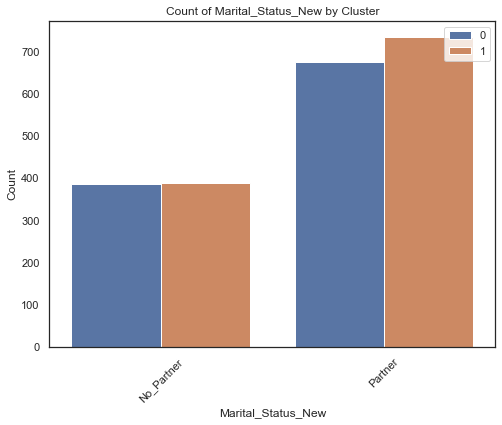

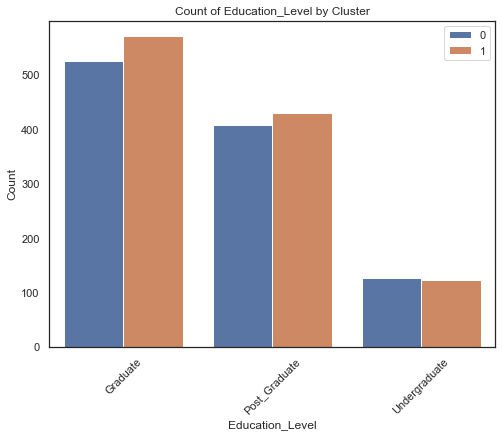

In [366]:
categorical_features = ['Purchasing_Channel', 'Marital_Status_New', 'Education_Level']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} by Cluster')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()

**Insights:** <br>
